## Imports 

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from numpy.linalg import norm

from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, median_absolute_error
from sklearn.impute import SimpleImputer

## Gradient Descent Algorithm Implementation

In [173]:
class LinearRegression:
    def __init__(self, learning_rate=0.1, itterations=1000, alpha=0.1):
        self.learning_rate = learning_rate
        self.itterations = itterations
        self.alpha = alpha
        self.weights = None

    def _get_predictions(self, x):
        return np.dot(x, self.weights)

    def _update_params(self, dw):
        self.weights -= self.learning_rate * dw
        #return self.weights

    def fit(self, x, y):
        self.n_samples, self.n_features = x.shape
        self.weights = np.zeros(self.n_features)

        def calculate_gradients(x, y, y_pred):
            error =  y_pred - y
            #error = np.sqrt(sum(y_pred - y)/len(y))
            #dw = (1 / self.n_samples) * np.dot(x.T, error)
            dw = (-( 2*(x.T).dot(y - y_pred)) + (2 * self.alpha * self.weights)) / self.n_samples
            return dw

        for iter in range(self.itterations):
            #print("iter ", iter)
            y_pred = self._get_predictions(x)
            params = calculate_gradients(x, y, y_pred)
            #print("new gradients", params)
            self._update_params(params)
            #print("new weights", self.weights)

    def predict(self, x):
        y_pred = self._get_predictions(x)
        return y_pred
        

    def score(self, x_pred, x_true):
        rmse = np.sqrt(sum(x_pred - x_true)/len(x_pred))
        return rmse
            

## K-NN Algorithm Implementation

In [242]:
class My_KNN :
    def __init__(self, k_neighbours = 5, metric = "euclidean"):
        self.k_neighbours = k_neighbours
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        # convert into array
        X_test = np.array(X_test)
        # predictions
        y_pred = []
        
        metric_funct = self._euclidean
        if self.metric == "manhattan" :
            metric_funct = self._manhattan
        if self.metric == "cosine" :
            metric_funct = self._cosine
            
        for row in range(len(X_test)) :
            distance = metric_funct(X_test[row])
            y_pred.append(self.y_train[np.argsort(distance, axis = 0)[:self.k_neighbours]].mean())

        return y_pred
    
    def _euclidean(self, row) : 
        return np.sqrt(np.sum((self.X_train - row)**2, axis = 1))
    
    def _manhattan(self, row) :
        return np.sum(np.absolute(self.X_train - row), axis = 1)
    
    def _cosine(self, row) :
        return 1 - np.dot(X_train, row)/(norm(X_train, axis=1)*norm(row))
    
    def _find_best_k (self, X_test, y_test, k_from, k_to, step, metric) :
        X_test, y_test = np.array(X_test), np.array(y_test)
        scores = []
        metric_funct = self._euclidean
        if metric == "manhattan" :
            metric_funct = self._manhattan
        if metric == "cosine" :
            metric_funct = self._cosine
        
        distances = []
        for row in range(len(X_test)) :
            distance = metric_funct(X_test[row])
            distances.append(np.argsort(distance, axis = 0))
        
        for i in range(k_from, k_to, step) :
            y_pred = []
            for row in range(len(X_test)) :
                y_pred.append(self.y_train[distances[row][:i]].mean())
            scores.append(self.score(y_pred, y_test))
            
        k = np.arange(k_from,k_to,step)
        plt.plot(k, scores, label = metric)
        plt.title("RMSE according to K")
        plt.xlabel("k_neighbours")
        plt.ylabel("RMSE")
        plt.legend(loc="upper right")
        return k[np.argmin(scores)], np.min(scores) 
    
    def best_params (self, X_test, y_test, k_from = 1, k_to = 20, step = 2) :
        metrics = ["euclidean", "manhattan", "cosine"]
        k_values = []
        scores = []
        
        for metric in metrics :
            print("search k for metric", metric)
            start = time.time()
            
            k, score = self._find_best_k(X_test, y_test, k_from, k_to, step, metric)
            k_values.append(k)
            scores.append(score)
            
            end = time.time()
            print("done in", (end-start)/60, "min")
        
        return {
            "metric" : metrics[np.argmin(scores)], 
            "k_neighbours" : k_values[np.argmin(scores)]
        }

    def score(self, y_true, y_pred):
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        rmse = np.sqrt(((y_true - y_pred)**2).mean())
        return rmse

# Data sets

## Diamonds

### Baseline Model

In [96]:
diamond = pd.read_csv("data/diamonds_dataset.csv")

In [97]:
diamond

,id,url,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,10086429,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,10016334,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,9947216,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,10083437,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,9946136,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
...,...,...,...,...,...,...,...,...,...,...,...
119302,10081678,https://www.brilliantearth.com//lab-diamonds-s...,Round,99040,5.71,Super Ideal,D,VVS2,GCAL,lab,2020-11-29 12-26 PM
119303,9521564,https://www.brilliantearth.com//lab-diamonds-s...,Cushion,107330,15.32,Very Good,G,SI2,IGI,lab,2020-11-29 12-26 PM
119304,9896730,https://www.brilliantearth.com//lab-diamonds-s...,Cushion,110110,10.05,Ideal,D,SI2,IGI,lab,2020-11-29 12-26 PM
119305,9756570,https://www.brilliantearth.com//lab-diamonds-s...,Oval,126030,10.33,Fair,D,VS2,IGI,lab,2020-11-29 12-26 PM


In [98]:
diamond.isna().sum()

id              0
url             0
shape           0
price           0
carat           0
cut             0
color           0
clarity         0
report          0
type            0
date_fetched    0
dtype: int64

In [99]:
diamond['cut'].unique()

array(['Very Good', 'Ideal', 'Super Ideal', 'Good', 'Fair'], dtype=object)

In [100]:
diamond['color'].unique()

array(['J', 'I', 'E', 'F', 'G', 'H', 'D'], dtype=object)

In [101]:
diamond['shape'].unique()

array(['Round', 'Emerald', 'Marquise', 'Princess', 'Pear', 'Heart',
       'Oval', 'Cushion', 'Asscher', 'Radiant'], dtype=object)

In [102]:
diamond['type'].unique()

array(['natural', 'lab'], dtype=object)

In [103]:
diamond.drop(['id', 'url', 'date_fetched', 'report', 'type', 'cut'], axis=1, inplace=True)

In [104]:
diamond

,shape,price,carat,color,clarity
0,Round,400,0.30,J,SI2
1,Emerald,400,0.31,I,SI1
2,Emerald,400,0.30,I,VS2
3,Round,400,0.30,I,SI2
4,Emerald,400,0.30,I,SI1
...,...,...,...,...,...
119302,Round,99040,5.71,D,VVS2
119303,Cushion,107330,15.32,G,SI2
119304,Cushion,110110,10.05,D,SI2
119305,Oval,126030,10.33,D,VS2


In [105]:
diamond_enc = pd.get_dummies(diamond[['shape', 'color', 'clarity']])
diamond_enc['price'] = diamond.price
diamond_enc['carat'] = diamond.carat


In [106]:
diamond_enc

,shape_Asscher,shape_Cushion,shape_Emerald,shape_Heart,shape_Marquise,shape_Oval,shape_Pear,shape_Princess,shape_Radiant,shape_Round,...,clarity_FL,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price,carat
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,400,0.30
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,400,0.31
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,400,0.30
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,400,0.30
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,400,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119302,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,99040,5.71
119303,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,107330,15.32
119304,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,110110,10.05
119305,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,126030,10.33


In [107]:
x_diamonds = diamond_enc.drop("price", axis=1)
y_diamonds = diamond_enc['price']

In [108]:
scaler = MinMaxScaler()
x_diamonds_scaled = scaler.fit_transform(x_diamonds)

In [109]:
x_diamonds_train, x_diamonds_test, y_diamonds_train, y_diamonds_test = train_test_split(x_diamonds_scaled, y_diamonds, test_size=0.2)

In [110]:
x_diamonds_train.shape, y_diamonds_train.shape, x_diamonds_test.shape, y_diamonds_test.shape

((95445, 26), (95445,), (23862, 26), (23862,))

In [111]:
x_diamonds_train = pd.DataFrame(x_diamonds_train)

In [112]:
def get_model_score(pipeline, X_train, X_test, y_train, y_test):
    
    pipeline.fit(X_train, y_train)
    
    cv = cross_val_score(pipeline, X_train, y_train, scoring = 'r2', cv = 5)
    cv_score = cv.mean()
    
    r2_score_train = r2_score(y_train, pipeline.predict(X_train))
    r2_score_test = r2_score(y_test, pipeline.predict(X_test))
    
    mse_train = mean_absolute_error(y_train, pipeline.predict(X_train))
    mse_test = mean_absolute_error(y_test, pipeline.predict(X_test))
    
    mae_train = median_absolute_error(y_train, pipeline.predict(X_train))
    mae_test = median_absolute_error(y_test, pipeline.predict(X_test)) 
    
    print("Mean CV score: ",cv_score)
    print("R2 score_train: ", r2_score_train)
    print("R2 score_test: ", r2_score_test)
    print("Train Mean Squeare Error: ", mse_train)
    print("Test Mean Squeare Error: ", mse_test)
    print("Train Mean Absolute Error: ", mae_train)
    print("Test Mean Absolute Error: ", mae_test)

### Baseline Model

In [113]:
linear = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lin_reg', Ridge())
])

In [114]:
get_model_score(linear, x_diamonds_train, x_diamonds_test, y_diamonds_train, y_diamonds_test)

Mean CV score:  0.4136791676856399
R2 score_train:  0.3747580633266553
R2 score_test:  0.33738380750892305
Train Mean Squeare Error:  2211.093026448925
Test Mean Squeare Error:  2278.109880354553
Train Mean Absolute Error:  1478.2907866666965
Test Mean Absolute Error:  1481.357279075225


In [115]:
dt = Pipeline([
    ('scaler', MinMaxScaler()),
    ('df_reg', DecisionTreeRegressor(min_samples_split=4))
])

In [116]:
get_model_score(dt, x_diamonds_train, x_diamonds_test, y_diamonds_train, y_diamonds_test)

Mean CV score:  0.3938138631855661
R2 score_train:  0.9487883192657246
R2 score_test:  0.4536715628807486
Train Mean Squeare Error:  599.49528697441
Test Mean Squeare Error:  1079.4278768938602
Train Mean Absolute Error:  173.33333333333337
Test Mean Absolute Error:  236.58116883116884


In [117]:
ada = Pipeline([
    ('scaler', MinMaxScaler()),
    ('ada_reg', AdaBoostRegressor())
])

In [118]:
get_model_score(ada, x_diamonds_train, x_diamonds_test, y_diamonds_train, y_diamonds_test)

Mean CV score:  0.38713256010795594
R2 score_train:  0.7315996328561147
R2 score_test:  0.6162610081147095
Train Mean Squeare Error:  2331.2037564358893
Test Mean Squeare Error:  2427.4596414054226
Train Mean Absolute Error:  1804.42067517929
Test Mean Absolute Error:  1804.42067517929


In [119]:
grad = Pipeline([
    ('scaler', MinMaxScaler()),
    ('grad_reg', GradientBoostingRegressor())
])

In [120]:
get_model_score(grad, x_diamonds_train, x_diamonds_test, y_diamonds_train, y_diamonds_test)

Mean CV score:  0.5748093231068842
R2 score_train:  0.8964823649987931
R2 score_test:  0.6958328506406151
Train Mean Squeare Error:  1134.9044706116574
Test Mean Squeare Error:  1233.3003543914228
Train Mean Absolute Error:  551.68127796658
Test Mean Absolute Error:  551.68127796658


### Gradient Descent

In [121]:
my_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr_reg', LinearRegression(alpha=1, itterations=1000))
])

In [122]:
get_model_score(my_lr, x_diamonds_train, x_diamonds_test, y_diamonds_train, y_diamonds_test)

Mean CV score:  0.23189597058120723
R2 score_train:  0.1892344839554666
R2 score_test:  0.15323878882438302
Train Mean Squeare Error:  1918.9965752142384
Test Mean Squeare Error:  2010.7567269211424
Train Mean Absolute Error:  1208.5846668472439
Test Mean Absolute Error:  1216.2947261271938


In [123]:
dictDiamonds = {}

The model has no regularization.

In [124]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]

for i in learning_rates:

    lr = LinearRegression(learning_rate=i, itterations=1000, alpha=1)
    lr.fit(x_diamonds_train.to_numpy(), y_diamonds_train)
    preds = lr.predict(x_diamonds_train)
    dictDiamonds[i] = mean_absolute_error(y_diamonds_train, preds)

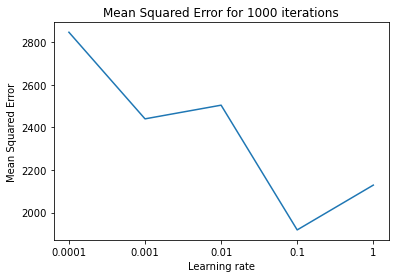

In [125]:
plt.plot(dictDiamonds.values())
plt.xticks(range(len(dictDiamonds.keys())), dictDiamonds.keys())
plt.title("Mean Squared Error for 1000 iterations")
plt.xlabel("Learning rate")
plt.ylabel("Mean Squared Error")
plt.show()

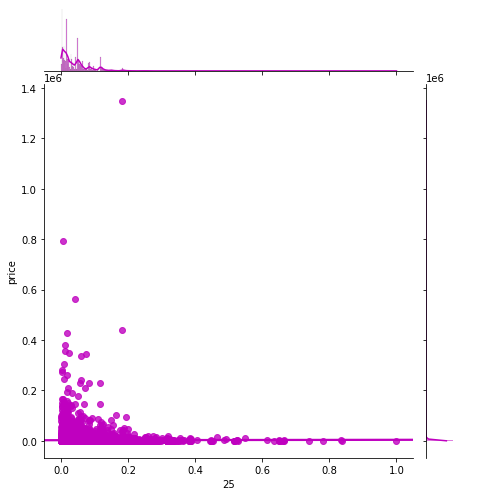

In [126]:
sns.jointplot(x=x_diamonds_train[25], y=y_diamonds_train,
                  kind="reg", truncate=False,
                  color="m", height=7)


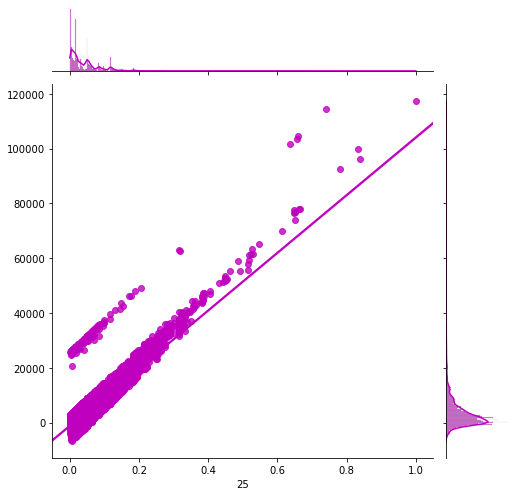

In [127]:
sns.jointplot(x=x_diamonds_train[25], y=preds,
                  kind="reg", truncate=False,
                  color="m", height=7)
plt.show()

### Apply regularization

In [128]:
reg_diamonds = {}

alpha = [1, 0.1,0.01, 0.001, 0.0001]

for i in learning_rates:

    lr = LinearRegression(learning_rate=0.1, itterations=1000, alpha=i)
    lr.fit(x_diamonds_train.to_numpy(), y_diamonds_train)
    preds = lr.predict(x_diamonds_train)
    reg_diamonds[i] = mean_squared_error(y_diamonds_train, preds)

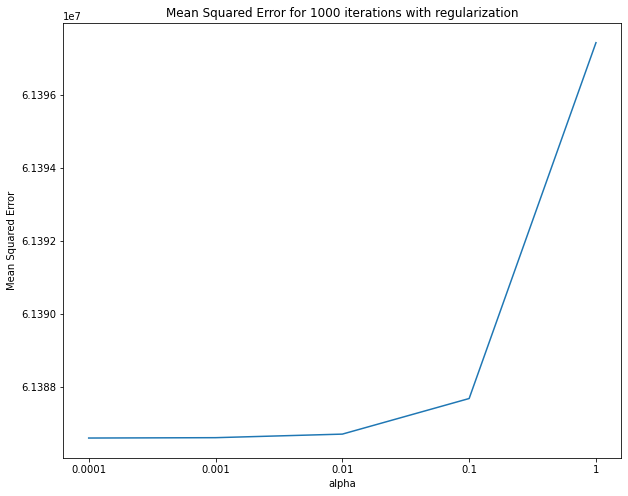

In [129]:
plt.figure(figsize=(10,8))
plt.plot(reg_diamonds.values())
plt.xticks(range(len(reg_diamonds.keys())), reg_diamonds.keys())
plt.title("Mean Squared Error for 1000 iterations with regularization")
plt.xlabel("alpha")
plt.ylabel("Mean Squared Error")
plt.show()

### K-NN

In [38]:
def knn_score(pipeline, X_train, X_test, y_train, y_test):
    
    pipeline.fit(X_train, y_train)
    
    start = time.time()
    y_pred_test = pipeline.predict(X_test)
    end = time.time()
    
    r2_score_test = r2_score(y_test, y_pred_test)
    
    mse_test = mean_absolute_error(y_test, y_pred_test)
    
    mae_test = median_absolute_error(y_test, y_pred_test)
    
    print("R2 score_test: ", r2_score_test)
    print("Test Mean Squeare Error: ", mse_test)
    print("Test Mean Absolute Error: ", mae_test)
    print("Predicting time :", (end - start)/60, "min")

In [39]:
my_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr_reg', My_KNN(k_neighbours = 7))
])

In [40]:
knn_score(my_knn, x_diamonds_train, x_diamonds_test, y_diamonds_train, y_diamonds_test)

R2 score_test:  0.3116251711596786
Test Mean Squeare Error:  1144.107427230384
Test Mean Absolute Error:  287.1428571428571
Predicting time : 4.561395514011383 min


#### Comparaison with scikit-learn knn algorithm

In [130]:
sk_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr_reg', KNeighborsRegressor(n_neighbors = 7))
])

In [225]:
knn_score(sk_knn, x_diamonds_train, x_diamonds_test, y_diamonds_train, y_diamonds_test)

R2 score_test:  0.3555279666500579
Test Mean Squeare Error:  1135.0198163248199
Test Mean Absolute Error:  281.42857142857144
Predicting time : 0.4027336597442627 min


In [131]:
get_model_score(sk_knn, x_diamonds_train, x_diamonds_test, y_diamonds_train, y_diamonds_test)

Mean CV score:  0.5017338476836457
R2 score_train:  0.6171158677653876
R2 score_test:  0.3555279666500579
Train Mean Squeare Error:  950.1545542309333
Test Mean Squeare Error:  1135.0198163248199
Train Mean Absolute Error:  251.42857142857133
Test Mean Absolute Error:  281.42857142857144


## New York Airbnb

In [133]:
air = pd.read_csv("./data/New York Airbnb_4 dec 2021.csv")

/tmp/ipykernel_5893/4215441625.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  air = pd.read_csv("./data/New York Airbnb_4 dec 2021.csv")


In [134]:
air

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,48,2019-11-04,0.33,3,338,0,NaN
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,LisaRoxanne,Brooklyn,Bedford-Stuyvesant,40.684940,-73.957650,Entire home/apt,75,1,409,2021-10-22,4.86,1,194,32,NaN
2,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,2016-06-05,0.52,2,365,0,NaN
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,5,2,2021-08-08,0.02,1,123,1,NaN
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,507,2021-11-08,3.68,1,192,33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38272,53662330,"HUGE PRIVATE ROOM, AWESOME LOCATION",100146245,Serin,Staten Island,Port Richmond,40.632222,-74.136715,Private room,79,1,0,NaN,NaN,6,359,0,NaN
38273,53662542,"LARGE PRVT ROOM, QUIET RESIDENCE PERFECTLOCATION",100146245,Serin,Staten Island,Port Richmond,40.630502,-74.136142,Private room,76,1,0,NaN,NaN,6,359,0,NaN
38274,53662772,King Room - Midtown Manhattan,337879004,Sinem,Manhattan,Midtown,40.753887,-73.980536,Private room,116,1,0,NaN,NaN,13,11,0,NaN
38275,53663081,King Room - Bryant Park.,337879004,Sinem,Manhattan,Midtown,40.755569,-73.981976,Private room,106,1,0,NaN,NaN,13,3,0,NaN


In [135]:
nyc_model = air.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review', 'license'])
nyc_model.isnull().sum()

neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 9504
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [136]:
mean = nyc_model['reviews_per_month'].mean()
nyc_model['reviews_per_month'].fillna(mean, inplace=True)
nyc_model.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [137]:
nyc_model

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,150,30,48,0.330000,3,338,0
1,Brooklyn,Bedford-Stuyvesant,40.684940,-73.957650,Entire home/apt,75,1,409,4.860000,1,194,32
2,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,60,30,50,0.520000,2,365,0
3,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,275,5,2,0.020000,1,123,1
4,Manhattan,Midtown,40.764570,-73.983170,Private room,68,2,507,3.680000,1,192,33
...,...,...,...,...,...,...,...,...,...,...,...,...
38272,Staten Island,Port Richmond,40.632222,-74.136715,Private room,79,1,0,1.721019,6,359,0
38273,Staten Island,Port Richmond,40.630502,-74.136142,Private room,76,1,0,1.721019,6,359,0
38274,Manhattan,Midtown,40.753887,-73.980536,Private room,116,1,0,1.721019,13,11,0
38275,Manhattan,Midtown,40.755569,-73.981976,Private room,106,1,0,1.721019,13,3,0


In [138]:
nyc_model['neighbourhood_group']= nyc_model['neighbourhood_group'].astype("category").cat.codes
nyc_model['neighbourhood'] = nyc_model['neighbourhood'].astype("category").cat.codes
nyc_model['room_type'] = nyc_model['room_type'].astype("category").cat.codes

<AxesSubplot:>

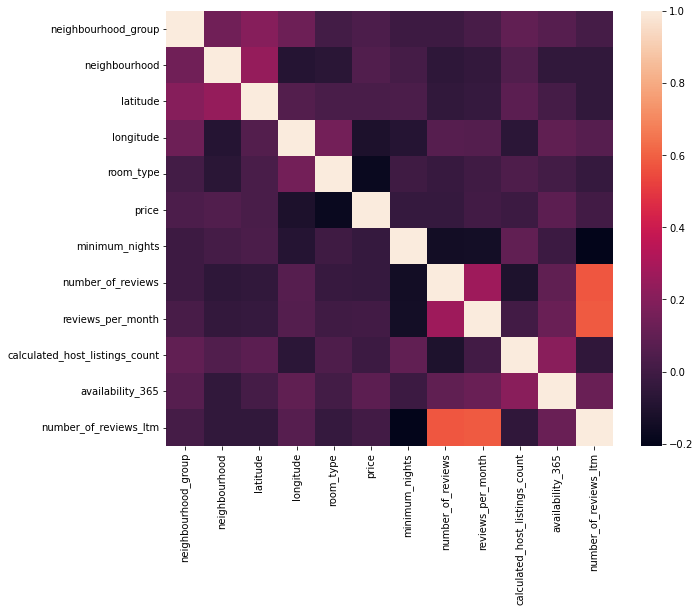

In [139]:
plt.figure(figsize=(10,8))
sns.heatmap(nyc_model.corr())

In [140]:
nyc_model.drop(["latitude", "longitude"], axis=1, inplace=True)

In [141]:
x = nyc_model.drop("price", axis=1)
y = nyc_model.price

In [142]:
x_air_train, x_air_test, y_air_train, y_air_test = train_test_split(x, y, test_size=0.2)

In [228]:
x_air_train.shape, x_air_test.shape

((30621, 9), (7656, 9))

### Base models

In [143]:
linear = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lin_reg', Ridge())
])

In [144]:
get_model_score(linear, x_air_train, x_air_test, y_air_train, y_air_test)

Mean CV score:  0.048093962278839886
R2 score_train:  0.04426651835886908
R2 score_test:  0.04660684022432493
Train Mean Squeare Error:  99.64354084457213
Test Mean Squeare Error:  102.75397636986301
Train Mean Absolute Error:  63.25788249134166
Test Mean Absolute Error:  63.130582450473156


In [145]:
dt = Pipeline([
    ('scaler', MinMaxScaler()),
    ('df_reg', DecisionTreeRegressor(min_samples_split=4))
])

In [146]:
get_model_score(dt, x_air_train, x_air_test, y_air_train, y_air_test)

Mean CV score:  -0.45298907295228863
R2 score_train:  0.7664997188219426
R2 score_test:  -0.3249423175606667
Train Mean Squeare Error:  28.454898423575894
Test Mean Squeare Error:  104.46429643081795
Train Mean Absolute Error:  5.0
Test Mean Absolute Error:  35.0


In [147]:
ada = Pipeline([
    ('scaler', MinMaxScaler()),
    ('ada_reg', AdaBoostRegressor())
])

In [148]:
get_model_score(ada, x_air_train, x_air_test, y_air_train, y_air_test)

Mean CV score:  -0.4516022372156453
R2 score_train:  -0.5371714761038644
R2 score_test:  -0.4055884067665416
Train Mean Squeare Error:  187.84445242966325
Test Mean Squeare Error:  189.44046678729177
Train Mean Absolute Error:  116.75426375210185
Test Mean Absolute Error:  116.9989317190421


In [149]:
grad = Pipeline([
    ('scaler', MinMaxScaler()),
    ('grad_reg', GradientBoostingRegressor())
])

In [150]:
get_model_score(grad, x_air_train, x_air_test, y_air_train, y_air_test)

Mean CV score:  0.12199920797639315
R2 score_train:  0.1703116501697456
R2 score_test:  0.14807190825984806
Train Mean Squeare Error:  86.52029197818845
Test Mean Squeare Error:  90.13194733973278
Train Mean Absolute Error:  48.60162299841054
Test Mean Absolute Error:  48.855124059176035


### Gradient Descent

In [151]:
my_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr_reg', LinearRegression(alpha=1, itterations=1000, learning_rate=0.1))
])

In [152]:
get_model_score(my_lr, x_air_train, x_air_test, y_air_train, y_air_test)

Mean CV score:  0.011688548958330847
R2 score_train:  0.011160881380421706
R2 score_test:  0.022552898906905927
Train Mean Squeare Error:  107.67346848331715
Test Mean Squeare Error:  110.22444071322641
Train Mean Absolute Error:  64.18636360423872
Test Mean Absolute Error:  63.87253637470313


In [153]:
params = {
    "learning_rate": [0.001, 0.01, 0.1, 1],
    'alpha': [0.001, 0.01, 0.1, 1]
}

In [154]:
scaler = MinMaxScaler()
x_air_train_scaled = scaler.fit_transform(x_air_train)
x_air_test_scaled = scaler.fit_transform(x_air_test)

In [155]:
grids = {}

for lern_rate in params['learning_rate']:
    for a in params['alpha']:
        lr = LinearRegression(learning_rate=lern_rate, itterations=1000, alpha=a)
        lr.fit(x_air_train_scaled, y_air_train.values)
        preds_train = lr.predict(x_air_train_scaled)
        preds_test = lr.predict(x_air_test_scaled)
        #mse_train = mean_squared_error(y_air_train.to_numpy(), preds_train)
        mse_test = mean_squared_error(y_air_test.to_numpy(), preds_test) 
        
        #grids[f"{lern_rate}_{a}_train"] = mse_train
        grids[f"lr_{lern_rate}_reg_{a}_test"] = mse_test        

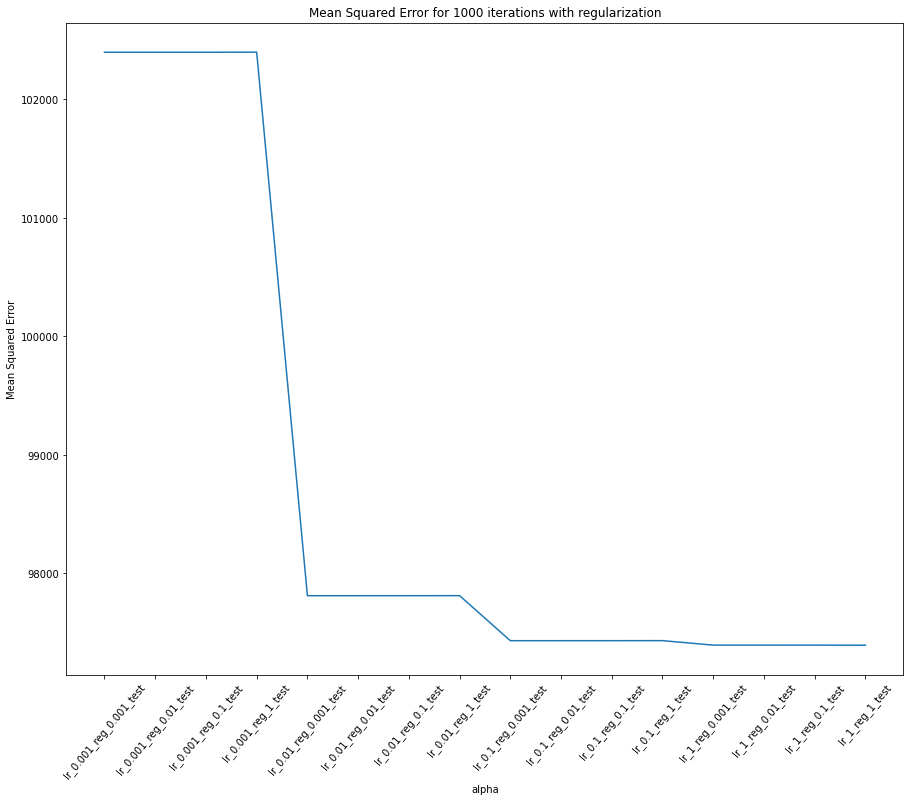

In [156]:
plt.figure(figsize=(15,12))
plt.plot(grids.values())
plt.xticks(range(len(grids.keys())), grids.keys())
plt.title("Mean Squared Error for 1000 iterations with regularization")
plt.xlabel("alpha")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation = 50)
plt.show()

### K-NN

In [160]:
my_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn_reg', My_KNN(k_neighbours = 7))
])

In [161]:
knn_score(my_knn, x_air_train, x_air_test, y_air_train, y_air_test)

R2 score_test:  0.08729840311445292
Test Mean Squeare Error:  93.08493805045529
Test Mean Absolute Error:  36.0
Predicting time : 0.23675545454025268 min


#### Comparaison with scikit-learn knn algorithm

In [162]:
sk_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn_reg', KNeighborsRegressor(n_neighbors= 7))
])

In [163]:
knn_score(sk_knn, x_air_train, x_air_test, y_air_train, y_air_test)

R2 score_test:  0.09323063940000609
Test Mean Squeare Error:  92.981881624123
Test Mean Absolute Error:  35.85714285714286
Predicting time : 0.0034331440925598144 min


In [164]:
get_model_score(sk_knn, x_air_train, x_air_test, y_air_train, y_air_test)

Mean CV score:  0.05051995911890565
R2 score_train:  0.29685359867137173
R2 score_test:  0.09323063940000609
Train Mean Squeare Error:  77.58646960302687
Test Mean Squeare Error:  92.981881624123
Train Mean Absolute Error:  29.85714285714286
Test Mean Absolute Error:  35.85714285714286


#### Finding the best parameters for this data set

In [167]:
minmax = MinMaxScaler()
X_train = minmax.fit_transform(np.array(x_air_train))
X_test = minmax.transform(np.array(x_air_test))

In [171]:
X_test

array([[0.75      , 0.12669683, 0.        , ..., 0.        , 0.3890411 ,
        0.04334365],
       [0.25      , 0.97737557, 0.        , ..., 0.        , 0.00273973,
        0.00154799],
       [0.25      , 0.18552036, 0.66666667, ..., 0.        , 0.33424658,
        0.        ],
       ...,
       [0.5       , 0.91855204, 0.        , ..., 0.04285714, 0.95068493,
        0.        ],
       [0.25      , 0.12217195, 0.        , ..., 0.        , 0.23013699,
        0.00464396],
       [0.25      , 0.97737557, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [187]:
model = My_KNN(k_neighbours=60, metric = "cosine")
model.fit(X_train, y_air_train)
y_pred = model.predict(X_test)

model.score(y_pred, y_air_test)

296.65369704679705

search k for metric euclidean
done in 0.24379454056421915 min
search k for metric manhattan
done in 0.24490572611490885 min
search k for metric cosine
done in 0.278230345249176 min
tot 46.017427921295166 min
{'metric': 'manhattan', 'k_neighbours': 9}


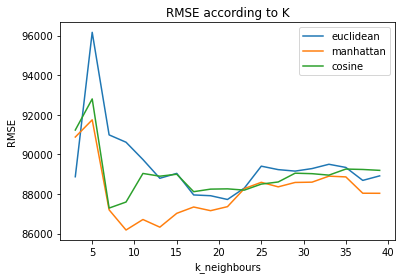

In [236]:
start = time.time()

knn = My_KNN()
knn.fit(X_train, y_air_train)
best_params = knn.best_params(X_test, y_air_test, 3, 40, 2)

end = time.time()
print("tot", end - start, "min")
print(best_params)

In [241]:
best_params

{'metric': 'manhattan', 'k_neighbours': 8}

## FPS

In [193]:
columns = ["CpuName", 'CpuNumberOfCores', 'CpuNumberOfThreads', 'CpuBaseClock', 'CpuCacheL1', 'CpuCacheL2', 'CpuCacheL3', 'CpuDieSize', 'CpuFrequency', 'CpuMultiplier', 'CpuMultiplierUnlocked', 'CpuProcessSize', 'CpuTDP', 'CpuNumberOfTransistors', 'CpuTurboClock', 'GpuName', 'GpuArchitecture', 'GpuBandwidth', 'GpuBaseClock', 'GpuBoostClock', 'GpuBus', 'GpuNumberOfComputeUnits', 'GpuDieSize', 'GpuDirectX', 'GpuNumberOfExecutionUnits', 'GpuFP32Performance', 'GpuMemoryBus', 'GpuMemorySize', 'GpuMemoryType', 'GpuOpenCL', 'GpuOpenGL', 'GpuPixelRate', 'GpuProcessSize', 'GpuNumberOfROPs', 'GpuShaderModel', 'GpuNumberOfShadingUnits', 'GpuNumberOfTMUs', 'GpuTextureRate', 'GpuNumberOfTransistors', 'GpuVulkan', 'GameName', 'GameResolution', 'GameSetting', 'Dataset', 'FPS']

In [194]:
fps = pd.read_csv("./data/fps-in-video-games.csv", delimiter=",", names=columns)

/tmp/ipykernel_5893/1903944840.py:1: DtypeWarning: Columns (6,17,22,25,26,27,29,34,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  fps = pd.read_csv("./data/fps-in-video-games.csv", delimiter=",", names=columns)


In [195]:
fps

,CpuName,CpuNumberOfCores,CpuNumberOfThreads,CpuBaseClock,CpuCacheL1,CpuCacheL2,CpuCacheL3,CpuDieSize,CpuFrequency,CpuMultiplier,...,GpuNumberOfShadingUnits,GpuNumberOfTMUs,GpuTextureRate,GpuNumberOfTransistors,GpuVulkan,GameName,GameResolution,GameSetting,Dataset,FPS
0,'Intel Core i7-920',4,8,133,256,1024,8,0.000263,2666,20.0,...,2304,144,182300,5700,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,70.0
1,'Intel Core i7-920',4,8,133,256,1024,8,0.000263,2666,20.0,...,2304,144,182300,5700,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,230.0
2,'Intel Core i5-4690',4,4,100,256,1024,6,0.000177,3400,34.0,...,2560,160,277300,7200,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,250.0
3,'Intel Core i5-4690',4,4,100,256,1024,6,0.000177,3400,34.0,...,2560,160,277300,7200,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,300.0
4,'Intel Core i5-4690',4,4,100,256,1024,6,0.000177,3400,34.0,...,896,56,61600,2080,1.2.131,counterStrikeGlobalOffensive,1080,low,userbenchmark,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425828,'AMD Ryzen 5 3600',6,12,100,576,3072,32,0.000074,3600,36.0,...,2048,128,159200,5700,1.2.131,rainbowSixSiege,1080,max,fpsbenchmark,51.5
425829,'AMD Ryzen 5 2600X',6,12,100,576,3072,16,0.000192,3600,36.0,...,2048,128,159200,5700,1.2.131,rainbowSixSiege,1080,max,fpsbenchmark,49.9
425830,'AMD Ryzen 5 1600X',6,12,100,576,3072,16,0.000192,3600,36.0,...,2048,128,159200,5700,1.2.131,rainbowSixSiege,1080,max,fpsbenchmark,46.9
425831,'AMD Ryzen 5 2600',6,12,100,576,3072,16,0.000192,3400,34.0,...,2048,128,159200,5700,1.2.131,rainbowSixSiege,1080,max,fpsbenchmark,46.4


In [196]:
fps.CpuName.nunique()

358

In [197]:
fps_numeric = fps.drop(['CpuName', 'CpuMultiplierUnlocked', 'GpuName', 'GpuArchitecture', 'GpuBus', 'GpuDirectX', 'GpuMemoryType', 'GpuOpenCL', 'GpuOpenGL', 'GpuShaderModel', 'GpuVulkan', 'Dataset', 'CpuCacheL3'], axis = 1)

In [198]:
fps_numeric['GameName'] = fps_numeric['GameName'].astype("category").cat.codes
fps_numeric['GameSetting'] = fps_numeric['GameSetting'].astype("category").cat.codes

In [199]:
fps_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425833 entries, 0 to 425832
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CpuNumberOfCores           425833 non-null  int64  
 1   CpuNumberOfThreads         425833 non-null  int64  
 2   CpuBaseClock               425833 non-null  int64  
 3   CpuCacheL1                 425833 non-null  int64  
 4   CpuCacheL2                 425833 non-null  int64  
 5   CpuDieSize                 425833 non-null  object 
 6   CpuFrequency               425833 non-null  int64  
 7   CpuMultiplier              425833 non-null  float64
 8   CpuProcessSize             425833 non-null  int64  
 9   CpuTDP                     425833 non-null  int64  
 10  CpuNumberOfTransistors     425833 non-null  object 
 11  CpuTurboClock              425833 non-null  int64  
 12  GpuBandwidth               425833 non-null  object 
 13  GpuBaseClock               42

In [200]:
fps_numeric= fps_numeric.replace("?", np.NaN)

In [201]:
fps_numeric.isna().sum()

CpuNumberOfCores                  0
CpuNumberOfThreads                0
CpuBaseClock                      0
CpuCacheL1                        0
CpuCacheL2                        0
CpuDieSize                   202534
CpuFrequency                      0
CpuMultiplier                     0
CpuProcessSize                    0
CpuTDP                            0
CpuNumberOfTransistors       226039
CpuTurboClock                     0
GpuBandwidth                  15441
GpuBaseClock                      0
GpuBoostClock                     0
GpuNumberOfComputeUnits      357107
GpuDieSize                    11196
GpuNumberOfExecutionUnits    412935
GpuFP32Performance               56
GpuMemoryBus                  15441
GpuMemorySize                 15441
GpuPixelRate                      0
GpuProcessSize                    0
GpuNumberOfROPs                   0
GpuNumberOfShadingUnits          56
GpuNumberOfTMUs                   0
GpuTextureRate                    0
GpuNumberOfTransistors      

I will drop more columns that have a lot of missing values

In [202]:
fps_numeric = fps_numeric.drop(['CpuDieSize', 'CpuNumberOfTransistors', 'GpuNumberOfComputeUnits', 'GpuNumberOfExecutionUnits'], axis=1)

In [203]:
inp = SimpleImputer()

In [204]:
fps_numeric_imputed = inp.fit_transform(fps_numeric)
fps_numeric_imputed = pd.DataFrame(fps_numeric_imputed, columns=fps_numeric.columns)

In [205]:
fps_numeric_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425833 entries, 0 to 425832
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CpuNumberOfCores         425833 non-null  float64
 1   CpuNumberOfThreads       425833 non-null  float64
 2   CpuBaseClock             425833 non-null  float64
 3   CpuCacheL1               425833 non-null  float64
 4   CpuCacheL2               425833 non-null  float64
 5   CpuFrequency             425833 non-null  float64
 6   CpuMultiplier            425833 non-null  float64
 7   CpuProcessSize           425833 non-null  float64
 8   CpuTDP                   425833 non-null  float64
 9   CpuTurboClock            425833 non-null  float64
 10  GpuBandwidth             425833 non-null  float64
 11  GpuBaseClock             425833 non-null  float64
 12  GpuBoostClock            425833 non-null  float64
 13  GpuDieSize               425833 non-null  float64
 14  GpuF

In [206]:
x = fps_numeric_imputed.drop("FPS", axis = 1)
y = fps_numeric_imputed.FPS

sc = MinMaxScaler()
x_scaled = sc.fit_transform(x)

x_fps_train, x_fps_test, y_fps_train, y_fps_test = train_test_split(x, y, test_size=0.2)

In [207]:
x_fps_train.shape, x_fps_test.shape, y_fps_train.shape, y_fps_test.shape

((340666, 27), (85167, 27), (340666,), (85167,))

In [230]:
(85167 + 340666) * 27

11497491

### Baseline Models

In [208]:
linear = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lin_reg', Ridge())
])

In [209]:
get_model_score(linear, x_fps_train, x_fps_test, y_fps_train, y_fps_test)

Mean CV score:  0.21523647361683382
R2 score_train:  0.21542970034147635
R2 score_test:  0.21717639119013932
Train Mean Squeare Error:  59.128746284026334
Test Mean Squeare Error:  59.00346057524842
Train Mean Absolute Error:  48.63579463795698
Test Mean Absolute Error:  48.63504272216434


In [210]:
dt = Pipeline([
    ('scaler', MinMaxScaler()),
    ('df_reg', DecisionTreeRegressor(min_samples_split=4))
])

In [211]:
get_model_score(dt, x_fps_train, x_fps_test, y_fps_train, y_fps_test)

Mean CV score:  0.6176194420991006
R2 score_train:  0.776222138393768
R2 score_test:  0.6270464524350172
Train Mean Squeare Error:  25.509987570748034
Test Mean Squeare Error:  33.25007592772401
Train Mean Absolute Error:  15.35364041604754
Test Mean Absolute Error:  20.0


In [212]:
ada = Pipeline([
    ('scaler', MinMaxScaler()),
    ('ada_reg', AdaBoostRegressor())
])

In [213]:
get_model_score(ada, x_fps_train, x_fps_test, y_fps_train, y_fps_test)

Mean CV score:  0.1646480660703411
R2 score_train:  0.17159573697468133
R2 score_test:  0.17521393879307856
Train Mean Squeare Error:  65.26628889207208
Test Mean Squeare Error:  64.99544587099841
Train Mean Absolute Error:  57.27079981678099
Test Mean Absolute Error:  57.27079981678099


In [214]:
grad = Pipeline([
    ('scaler', MinMaxScaler()),
    ('grad_reg', GradientBoostingRegressor())
])

In [215]:
get_model_score(grad, x_fps_train, x_fps_test, y_fps_train, y_fps_test)

Mean CV score:  0.6344324356627047
R2 score_train:  0.6349701823425502
R2 score_test:  0.6387887005626752
Train Mean Squeare Error:  35.532505548031985
Test Mean Squeare Error:  35.55280072219344
Train Mean Absolute Error:  25.01967501293906
Test Mean Absolute Error:  25.057035126703184


### Gradient Descent

In [216]:
my_lr = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr_reg', LinearRegression(alpha=1, itterations=1000))
])

In [217]:
get_model_score(my_lr, x_fps_train, x_fps_test, y_fps_train, y_fps_test)

Mean CV score:  0.21034095637003042
R2 score_train:  0.21039945778743463
R2 score_test:  0.2126193594574095
Train Mean Squeare Error:  59.359373224498036
Test Mean Squeare Error:  59.221769591477994
Train Mean Absolute Error:  49.06950915183293
Test Mean Absolute Error:  48.987222863883204


In [218]:
x_scaled_train, x_scaled_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2)

In [219]:
x_scaled_test.shape

(85167, 27)

In [220]:
x_scaled_test

array([[0.09677419, 0.04761905, 0.        , ..., 0.13793103, 0.5       ,
        0.66666667],
       [0.22580645, 0.11111111, 0.14285714, ..., 0.24137931, 1.        ,
        0.66666667],
       [0.03225806, 0.04761905, 0.        , ..., 0.31034483, 0.        ,
        0.33333333],
       ...,
       [0.16129032, 0.07936508, 0.        , ..., 0.55172414, 0.5       ,
        0.66666667],
       [0.03225806, 0.04761905, 0.        , ..., 0.44827586, 0.        ,
        0.        ],
       [0.09677419, 0.11111111, 0.        , ..., 0.5862069 , 0.5       ,
        0.        ]])

In [135]:
grids = {}

for lern_rate in params['learning_rate']:
    for a in params['alpha']:
        lr = LinearRegression(learning_rate=lern_rate, itterations=1000, alpha=a)
        lr.fit(x_scaled_train, y_train.values)
        #preds_train = lr.predict(x_air_train_scaled)
        preds_test = lr.predict(x_scaled_test)
        #mse_train = mean_squared_error(y_air_train.to_numpy(), preds_train)
        mse_test = mean_squared_error(y_test.values, preds_test) 
        
        #grids[f"{lern_rate}_{a}_train"] = mse_train
        grids[f"lr_{lern_rate}_reg_{a}_test"] = mse_test       

/tmp/ipykernel_4186/1172755435.py:23: RuntimeWarning: overflow encountered in multiply
  dw = (-( 2*(x.T).dot(y - y_pred)) + (2 * self.alpha * self.weights)) / self.n_samples


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.figure(figsize=(15,12))
plt.plot(grids.values())
plt.xticks(range(len(grids.keys())), grids.keys())
plt.title("Mean Squared Error for 1000 iterations with regularization")
plt.xlabel("alpha")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation = 50)
plt.show()

### K-NN

In [221]:
my_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('lr_reg', My_KNN(k_neighbours = 7))
])

takes approximatly 1 hour

In [222]:
knn_score(my_knn, x_fps_train, x_fps_test, y_fps_train, y_fps_test)

R2 score_test:  0.6000846187331306
Test Mean Squeare Error:  36.724988216428564
Test Mean Absolute Error:  24.285714285714292
Predicting time : 59.66690292358398 min


#### Comparaison with scikit-learn knn algorithm

In [223]:
sk_knn = Pipeline([
    ('scaler', MinMaxScaler()),
    ('knn_reg', KNeighborsRegressor(n_neighbors= 7))
])

In [224]:
knn_score(sk_knn, x_fps_train, x_fps_test, y_fps_train, y_fps_test)

R2 score_test:  0.6000435896647892
Test Mean Squeare Error:  36.87404125340298
Test Mean Absolute Error:  24.285714285714292
Predicting time : 5.4873807271321615 min
